In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import kruskal
from scipy.stats import chi2_contingency

In [3]:
dt = pd.read_csv(r"C:\Users\99299\OneDrive\Desktop\Desktop\test jupyter\Yulu_dataset.csv")
dt                 

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [6]:
# Display the first few rows of the dataset
print(dt.head())



              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  


In [7]:
# Get an overview of the dataset's structure
print(dt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
None


In [11]:
# Display basic statistics of numerical columns
print(dt.describe())

             season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.96047

In [9]:

# Check for missing values
print(dt.isnull().sum())

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


# Univariate analysis

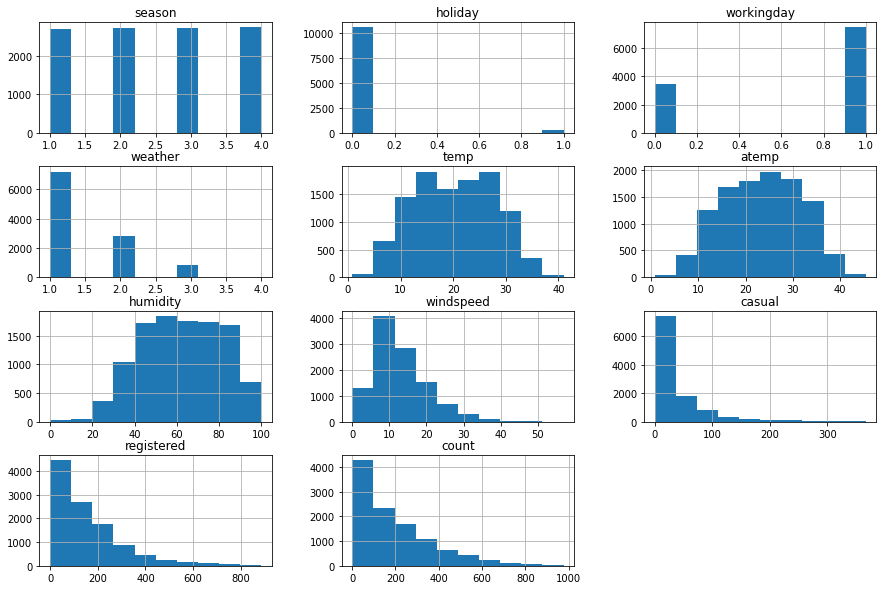

In [20]:
# Plot histograms for numerical variables
dt.hist(figsize=(15, 10))
plt.show()

1 Season graph discribe equal distribution over every season
2 Holiday graph describe large value of non holiday data then holiday
3 working graph tell us most of data is from working day then non working day
4 weather graph tell's us that weather directly effects the revanue 
5 temprature follows normalatiy in graph 
6 And this analysis tell's us that number of casual users are more than registerd one.

In [26]:
dt['datetime'] = pd.to_datetime(dt['datetime'])

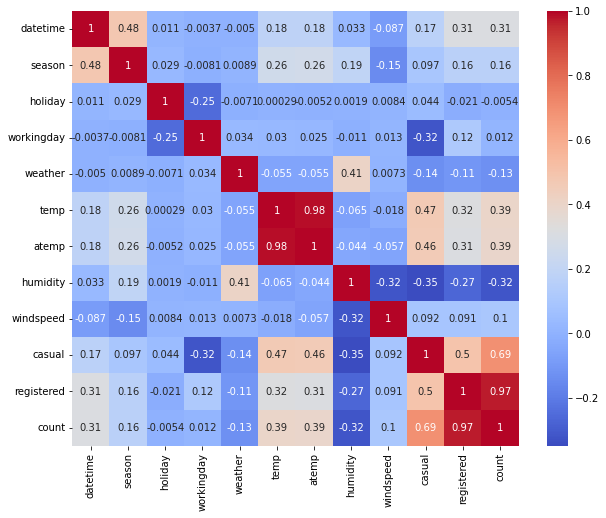

In [27]:
# Create a heatmap to visualize correlation between numerical variables
correlation_matrix = dt.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

According to the above graph some of the factors are corealated to each other 
like season and datetime, temp and atemp, casual and temprature, humidity and weather, count and temp, 

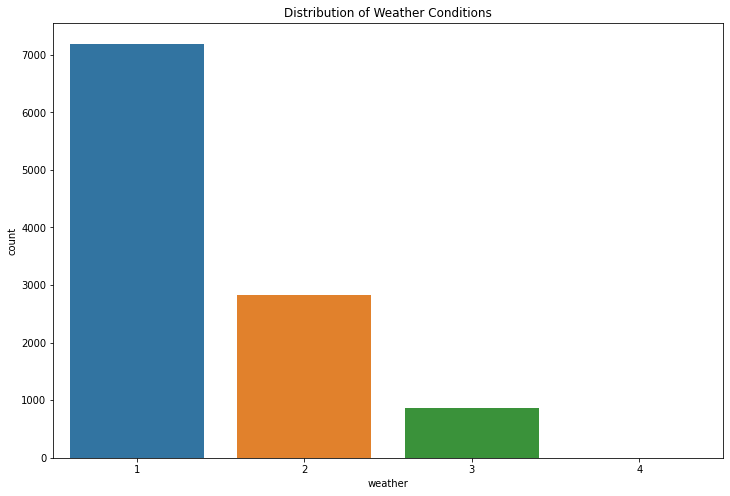

In [43]:
plt.figure(figsize=(12, 8))
sns.countplot(data=dt, x="weather")
plt.title("Distribution of Weather Conditions")
plt.show()

Above graph tell's us that no one is using service while weather is worse

# Bivariate analysis

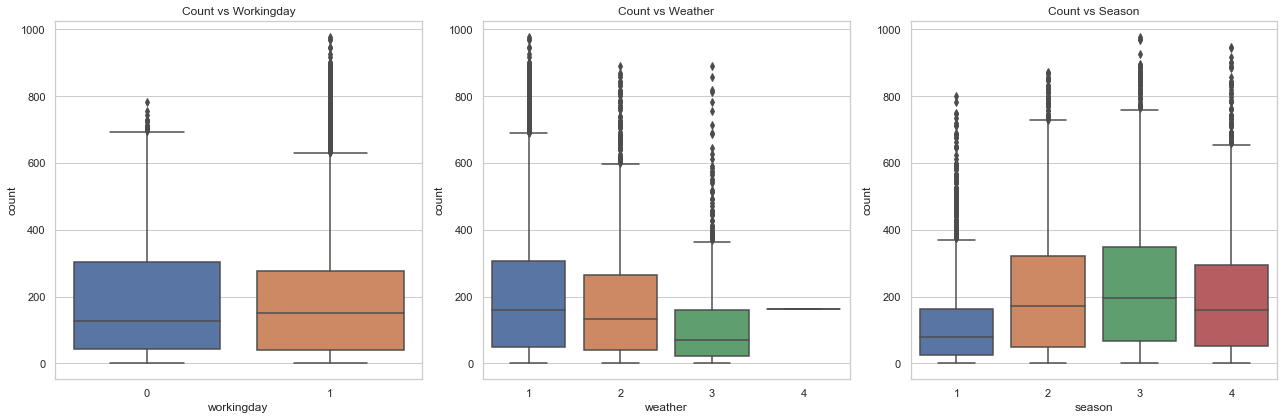

In [48]:
# Create subplots for different independent variables
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Relationship between count and workingday
sns.boxplot(data=dt, x="workingday", y="count", ax=axes[0])
axes[0].set_title("Count vs Workingday")

# Relationship between count and weather
sns.boxplot(data=dt, x="weather", y="count", ax=axes[1])
axes[1].set_title("Count vs Weather")

# Relationship between count and season
sns.boxplot(data=dt, x="season", y="count", ax=axes[2])
axes[2].set_title("Count vs Season")

plt.tight_layout()
plt.show()

# Working Day Effect on Bike Rentals:

In [49]:
# Separate dt into working days and non-working days
workingday_rentals = dt[dt['workingday'] == 1]['count']
non_workingday_rentals = dt[dt['workingday'] == 0]['count']

# Perform 2-sample t-test
t_stat, p_value = ttest_ind(workingday_rentals, non_workingday_rentals)

# Set significance level (alpha)
alpha = 0.05

# Compare p-value with significance level
if p_value < alpha:
    print("Reject Null Hypothesis: Working day has an effect on bike rentals.")
else:
    print("Fail to reject Null Hypothesis: Working day does not have a significant effect on bike rentals.")


Fail to reject Null Hypothesis: Working day does not have a significant effect on bike rentals.


# Comparison of Bike Rentals in Different Seasons:

In [51]:
# Separate dt into different seasons
spring_rentals = dt[dt['season'] == 1]['count']
summer_rentals = dt[dt['season'] == 2]['count']
fall_rentals = dt[dt['season'] == 3]['count']
winter_rentals = dt[dt['season'] == 4]['count']

# Perform ANOVA test
f_stat, p_value = f_oneway(spring_rentals, summer_rentals, fall_rentals, winter_rentals)

# Set significance level (alpha)
alpha = 0.05

# Compare p-value with significance level
if p_value < alpha:
    print("Reject Null Hypothesis: There is a significant difference in bike rentals across different seasons.")
else:
    print("Fail to reject Null Hypothesis: Bike rentals are similar across different seasons.")

Reject Null Hypothesis: There is a significant difference in bike rentals across different seasons.


# Comparison of Bike Rentals in Different Weather Conditions:

In [53]:
# Separate dt into different weather conditions
weather_1_rentals = dt[dt['weather'] == 1]['count']
weather_2_rentals = dt[dt['weather'] == 2]['count']
weather_3_rentals = dt[dt['weather'] == 3]['count']
weather_4_rentals = dt[dt['weather'] == 4]['count']

# Perform Kruskal-Wallis H test
h_stat, p_value = kruskal(weather_1_rentals, weather_2_rentals, weather_3_rentals, weather_4_rentals)

# Set significance level (alpha)
alpha = 0.05

# Compare p-value with significance level
if p_value < alpha:
    print("Reject Null Hypothesis: There is a significant difference in bike rentals across different weather conditions.")
else:
    print("Fail to reject Null Hypothesis: Bike rentals are similar across different weather conditions.")


Reject Null Hypothesis: There is a significant difference in bike rentals across different weather conditions.


# Dependence of Weather on Season:

In [55]:
# Create a contingency table
contingency_table = pd.crosstab(dt['weather'], dt['season'])

# Perform Chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Set significance level (alpha)
alpha = 0.05

# Compare p-value with significance level
if p_value < alpha:
    print("Reject Null Hypothesis: Weather and season are dependent.")
else:
    print("Fail to reject Null Hypothesis: Weather and season are independent.")

Reject Null Hypothesis: Weather and season are dependent.
